In [63]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# STEP 1

In [49]:
train=pd.read_csv("C:\\Users\\User\\Desktop\\koleya\\level2 term2\\neural networks\\project\\project 1\\mnist_train.csv")
test= pd.read_csv("C:\\Users\\User\\Desktop\\koleya\\level2 term2\\neural networks\\project\\project 1\\mnist_test.csv")
data=pd.concat([train, test], axis=0)
data

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
# Split the data into features (X) and labels (y)
X = data.iloc[:, 1:].values 
y = data.iloc[:, 0].values

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 2

In [32]:
# Define the neural network architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [33]:
# Create the neural network
np.random.seed(0)
torch.manual_seed(0)
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.01)

In [34]:
num_epochs = 10
batch_size = 64

In [43]:
# Train the neural network
def trainvalid(net,criterion,optimizer,num_epochs,batch_size):
    train_losses = []
    valid_losses = []
    train_accs = []
    valid_accs = []
    for epoch in range(num_epochs):
        running_train_loss = 0.0
        running_valid_loss = 0.0
        running_train_acc = 0.0
        running_valid_acc = 0.0
        net.train()
        for i in range(0, len(X_train), batch_size):
            inputs = torch.tensor(X_train[i:i+batch_size], dtype=torch.float32)
            labels = torch.tensor(y_train[i:i+batch_size], dtype=torch.long)

            optimizer.zero_grad()

            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_train_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            running_train_acc += (predicted == labels).sum().item() / batch_size

        net.eval()
        with torch.no_grad():
            for i in range(0, len(X_valid), batch_size):
                inputs = torch.tensor(X_valid[i:i+batch_size], dtype=torch.float32)
                labels = torch.tensor(y_valid[i:i+batch_size], dtype=torch.long)

                outputs = net(inputs)
                loss = criterion(outputs, labels)

                running_valid_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                running_valid_acc += (predicted == labels).sum().item() / batch_size
        train_losses.append(running_train_loss / len(X_train))
        valid_losses.append(running_valid_loss / len(X_valid))
        train_accs.append(running_train_acc / (len(X_train) / batch_size))
        valid_accs.append(running_valid_acc / (len(X_valid) / batch_size))
        print(f'Epoch {epoch+1}, Train Loss: {train_losses[-1]:.2f}, Valid Loss: {valid_losses[-1]:.2f}, Train Acc: {train_accs[-1]:.2f}, Valid Acc: {valid_accs[-1]:.2f}')
    plt.plot(train_losses, label='Train')
    plt.plot(valid_losses, label='Validation')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Plot the training and validation accuracy
    plt.plot(train_accs, label='Train')
    plt.plot(valid_accs, label='Validation')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

Epoch 1, Train Loss: 0.00, Valid Loss: 0.00, Train Acc: 0.95, Valid Acc: 0.97
Epoch 2, Train Loss: 0.00, Valid Loss: 0.00, Train Acc: 0.95, Valid Acc: 0.97
Epoch 3, Train Loss: 0.00, Valid Loss: 0.00, Train Acc: 0.95, Valid Acc: 0.97
Epoch 4, Train Loss: 0.00, Valid Loss: 0.00, Train Acc: 0.95, Valid Acc: 0.97
Epoch 5, Train Loss: 0.00, Valid Loss: 0.00, Train Acc: 0.95, Valid Acc: 0.97
Epoch 6, Train Loss: 0.00, Valid Loss: 0.00, Train Acc: 0.95, Valid Acc: 0.97
Epoch 7, Train Loss: 0.00, Valid Loss: 0.00, Train Acc: 0.95, Valid Acc: 0.97
Epoch 8, Train Loss: 0.00, Valid Loss: 0.00, Train Acc: 0.95, Valid Acc: 0.97
Epoch 9, Train Loss: 0.00, Valid Loss: 0.00, Train Acc: 0.95, Valid Acc: 0.97
Epoch 10, Train Loss: 0.00, Valid Loss: 0.00, Train Acc: 0.95, Valid Acc: 0.97


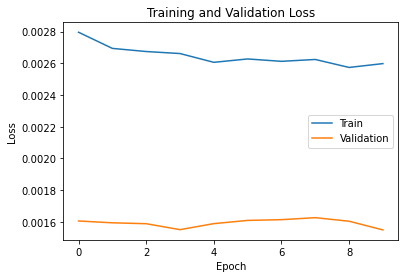

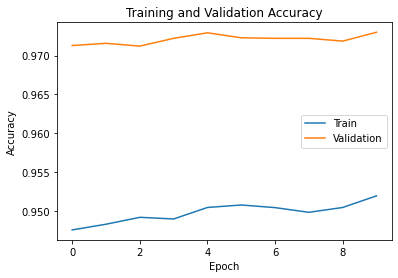

In [46]:
trainvalid(net,criterion,optimizer,num_epochs,batch_size)

# STEP 3

In [58]:
# Define the neural network architecture
class Net_2(nn.Module):
    def __init__(self,do):
        super(Net_2, self).__init__()
        self.fc1 = nn.Linear(784, 128)
        self.bn1 = nn.BatchNorm1d(128)
        self.drop1 = nn.Dropout(p=do)
        self.fc2 = nn.Linear(128, 64)
        self.bn2 = nn.BatchNorm1d(64)
        self.drop2 = nn.Dropout(p=do)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = torch.relu(self.bn1(self.fc1(x)))
        x = self.drop1(x)
        x = torch.relu(self.bn2(self.fc2(x)))
        x = self.drop2(x)
        x = self.fc3(x)
        return x

In [59]:
np.random.seed(0)
torch.manual_seed(0)
# Create the neural network
do=0.5
net = Net_2(do)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.01)

Epoch 1, Train Loss: 0.01, Valid Loss: 0.00, Train Acc: 0.85, Valid Acc: 0.95
Epoch 2, Train Loss: 0.01, Valid Loss: 0.00, Train Acc: 0.90, Valid Acc: 0.95
Epoch 3, Train Loss: 0.00, Valid Loss: 0.00, Train Acc: 0.91, Valid Acc: 0.96
Epoch 4, Train Loss: 0.00, Valid Loss: 0.00, Train Acc: 0.92, Valid Acc: 0.96
Epoch 5, Train Loss: 0.00, Valid Loss: 0.00, Train Acc: 0.92, Valid Acc: 0.96
Epoch 6, Train Loss: 0.00, Valid Loss: 0.00, Train Acc: 0.93, Valid Acc: 0.96
Epoch 7, Train Loss: 0.00, Valid Loss: 0.00, Train Acc: 0.93, Valid Acc: 0.96
Epoch 8, Train Loss: 0.00, Valid Loss: 0.00, Train Acc: 0.93, Valid Acc: 0.97
Epoch 9, Train Loss: 0.00, Valid Loss: 0.00, Train Acc: 0.94, Valid Acc: 0.97
Epoch 10, Train Loss: 0.00, Valid Loss: 0.00, Train Acc: 0.94, Valid Acc: 0.97


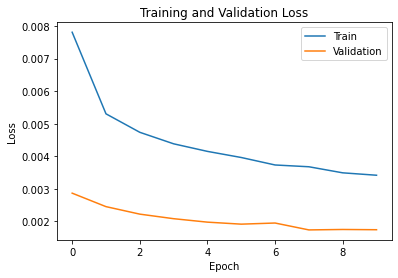

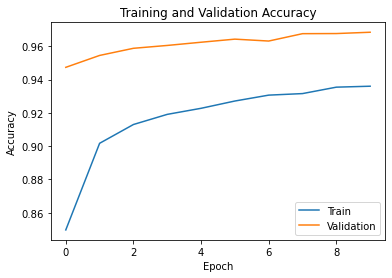

In [60]:
# Train the neural network
num_epochs = 10
batch_size = 64
trainvalid(net,criterion,optimizer,num_epochs,batch_size)

# STEP 4

In [47]:
# Define the neural network architecture
np.random.seed(0)
torch.manual_seed(0)
# Create the neural network
do=0.2
net = Net_2(do)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

Epoch 1, Train Loss: 0.01, Valid Loss: 0.00, Train Acc: 0.91, Valid Acc: 0.96
Epoch 2, Train Loss: 0.00, Valid Loss: 0.00, Train Acc: 0.95, Valid Acc: 0.97
Epoch 3, Train Loss: 0.00, Valid Loss: 0.00, Train Acc: 0.96, Valid Acc: 0.97
Epoch 4, Train Loss: 0.00, Valid Loss: 0.00, Train Acc: 0.97, Valid Acc: 0.97
Epoch 5, Train Loss: 0.00, Valid Loss: 0.00, Train Acc: 0.97, Valid Acc: 0.97
Epoch 6, Train Loss: 0.00, Valid Loss: 0.00, Train Acc: 0.97, Valid Acc: 0.97
Epoch 7, Train Loss: 0.00, Valid Loss: 0.00, Train Acc: 0.97, Valid Acc: 0.98
Epoch 8, Train Loss: 0.00, Valid Loss: 0.00, Train Acc: 0.98, Valid Acc: 0.98
Epoch 9, Train Loss: 0.00, Valid Loss: 0.00, Train Acc: 0.98, Valid Acc: 0.98
Epoch 10, Train Loss: 0.00, Valid Loss: 0.00, Train Acc: 0.98, Valid Acc: 0.98


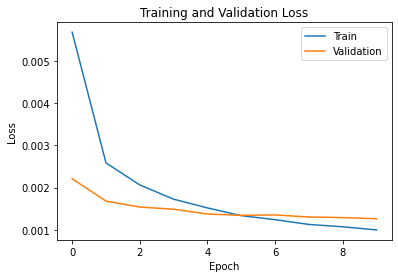

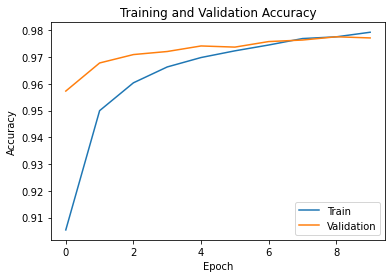

In [48]:
# Train the neural network
num_epochs = 10
batch_size = 64
trainvalid(net,criterion,optimizer,num_epochs,batch_size)

In [64]:
# Define the neural network architecture
np.random.seed(0)
torch.manual_seed(0)
# Create the neural network
net = Net_2(0.4)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.0005)

Epoch 1, Train Loss: 0.01, Valid Loss: 0.00, Train Acc: 0.84, Valid Acc: 0.94
Epoch 2, Train Loss: 0.00, Valid Loss: 0.00, Train Acc: 0.91, Valid Acc: 0.95
Epoch 3, Train Loss: 0.00, Valid Loss: 0.00, Train Acc: 0.92, Valid Acc: 0.96
Epoch 4, Train Loss: 0.00, Valid Loss: 0.00, Train Acc: 0.93, Valid Acc: 0.96
Epoch 5, Train Loss: 0.00, Valid Loss: 0.00, Train Acc: 0.94, Valid Acc: 0.97
Epoch 6, Train Loss: 0.00, Valid Loss: 0.00, Train Acc: 0.94, Valid Acc: 0.97
Epoch 7, Train Loss: 0.00, Valid Loss: 0.00, Train Acc: 0.95, Valid Acc: 0.97
Epoch 8, Train Loss: 0.00, Valid Loss: 0.00, Train Acc: 0.95, Valid Acc: 0.97
Epoch 9, Train Loss: 0.00, Valid Loss: 0.00, Train Acc: 0.95, Valid Acc: 0.97
Epoch 10, Train Loss: 0.00, Valid Loss: 0.00, Train Acc: 0.95, Valid Acc: 0.97


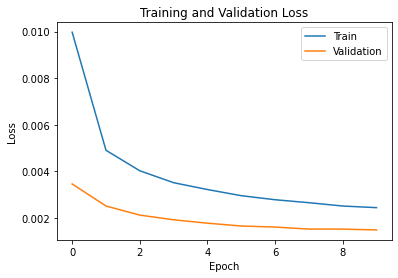

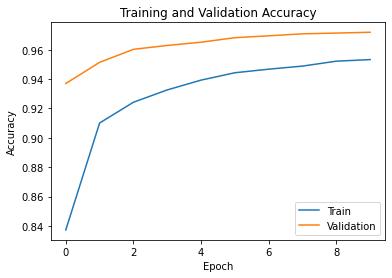

In [65]:
# Train the neural network
num_epochs = 10
batch_size = 64
trainvalid(net,criterion,optimizer,num_epochs,batch_size)

In [61]:
# Define the neural network architecture
np.random.seed(0)
torch.manual_seed(0)
# Create the neural network
do=0.6
net = Net_2(0.6)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.0001)

Epoch 1, Train Loss: 0.02, Valid Loss: 0.01, Train Acc: 0.52, Valid Acc: 0.87
Epoch 2, Train Loss: 0.01, Valid Loss: 0.01, Train Acc: 0.76, Valid Acc: 0.90
Epoch 3, Train Loss: 0.01, Valid Loss: 0.01, Train Acc: 0.81, Valid Acc: 0.91
Epoch 4, Train Loss: 0.01, Valid Loss: 0.00, Train Acc: 0.83, Valid Acc: 0.92
Epoch 5, Train Loss: 0.01, Valid Loss: 0.00, Train Acc: 0.84, Valid Acc: 0.93
Epoch 6, Train Loss: 0.01, Valid Loss: 0.00, Train Acc: 0.85, Valid Acc: 0.93
Epoch 7, Train Loss: 0.01, Valid Loss: 0.00, Train Acc: 0.86, Valid Acc: 0.93
Epoch 8, Train Loss: 0.01, Valid Loss: 0.00, Train Acc: 0.86, Valid Acc: 0.94
Epoch 9, Train Loss: 0.01, Valid Loss: 0.00, Train Acc: 0.87, Valid Acc: 0.94
Epoch 10, Train Loss: 0.01, Valid Loss: 0.00, Train Acc: 0.87, Valid Acc: 0.94


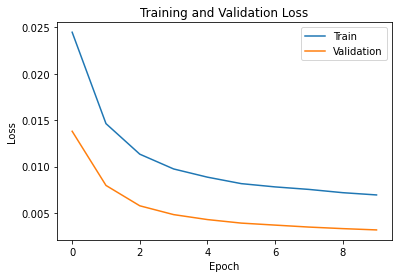

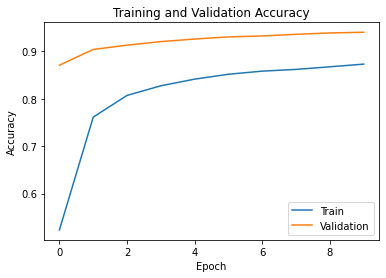

In [62]:
# Train the neural network
num_epochs = 10
batch_size = 64
trainvalid(net,criterion,optimizer,num_epochs,batch_size)